# Handwritten Number Detection

### Importing the required libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Loading dataset and creating training & testing datas 

In [5]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[0].shape

(28, 28)

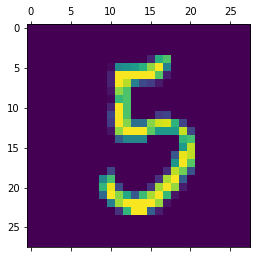

In [9]:
plt.matshow(x_train[4312])

In [10]:
y_train[4312]

5

In [11]:
x_train.shape

(60000, 28, 28)

### Scaling the data

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [14]:
x_test_flattened.shape

(10000, 784)

## Creating a single layer model

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4672 - accuracy: 0.8777
Epoch 2/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3045 - accuracy: 0.9149
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2669 - accuracy: 0.9253
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2622 - accuracy: 0.9266
Epoch 7/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2584 - accuracy: 0.9290


### Evaluating the created model

In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2641 - accuracy: 0.9257


[0.2641167938709259, 0.9257000088691711]

In [18]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 1s 3ms/step


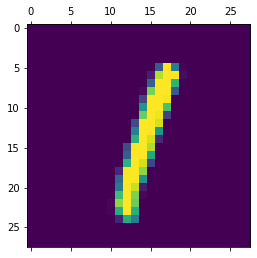

In [17]:
plt.matshow(x_test[5])

In [19]:
y_predicted[5]

array([3.0339073e-05, 9.9783683e-01, 4.1816157e-01, 3.0701578e-01,
       6.3408292e-03, 1.6885085e-02, 5.7466161e-03, 6.3719445e-01,
       4.4825423e-01, 1.3769226e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[5])

1

### Making the predictions easier to understand

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(69.0, 0.5, 'Truth')

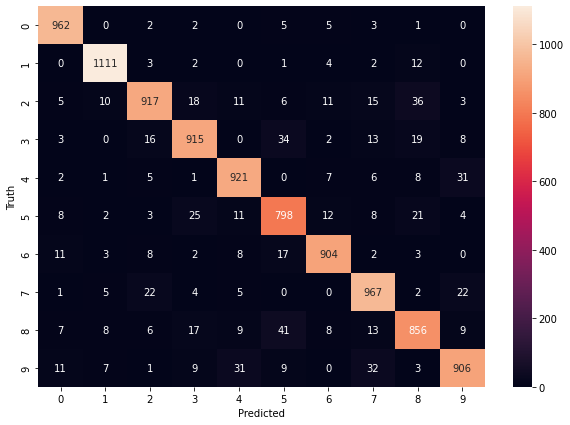

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Adding a hidden layer

In [31]:
model1 = keras.Sequential([
    keras.layers.Dense(250, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),

])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(x_train_flattened, y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2257 - accuracy: 0.9338
Epoch 2/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0930 - accuracy: 0.9722
Epoch 3/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0604 - accuracy: 0.9812
Epoch 4/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0446 - accuracy: 0.9861
Epoch 5/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 7/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 8/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 9/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 10/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.010

### Evaluating the new model

In [32]:
model1.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0758 - accuracy: 0.9824


[0.07584990561008453, 0.9824000000953674]

In [41]:
y_predicted_new

array([[5.29963290e-05, 2.00592895e-05, 8.50096170e-04, ...,
        9.99999762e-01, 1.99171947e-04, 2.46526331e-01],
       [5.66535675e-07, 4.88401800e-02, 1.00000000e+00, ...,
        2.01890551e-17, 4.12809430e-03, 3.42477847e-12],
       [5.93656964e-08, 9.99990284e-01, 9.08992141e-02, ...,
        1.38007358e-01, 1.13392875e-01, 1.20610548e-06],
       ...,
       [2.53405678e-14, 9.47135064e-08, 3.70463174e-11, ...,
        1.55472318e-02, 9.93241295e-02, 9.70507801e-01],
       [3.10611867e-05, 1.29792488e-08, 9.28033671e-07, ...,
        6.58482304e-06, 7.48561859e-01, 4.36099712e-10],
       [1.90209619e-06, 8.22203959e-13, 2.43138129e-06, ...,
        2.17260658e-13, 2.05293944e-07, 3.19780639e-07]], dtype=float32)

In [40]:
y_predicted_new = model1.predict(x_test_flattened)
y_predicted_labels_new = [np.argmax(i) for i in y_predicted_new]

313/313 [==============================] - 1s 2ms/step


In [42]:
y_predicted_labels_new

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 5,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [38]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels_new)

Text(69.0, 0.5, 'Truth')

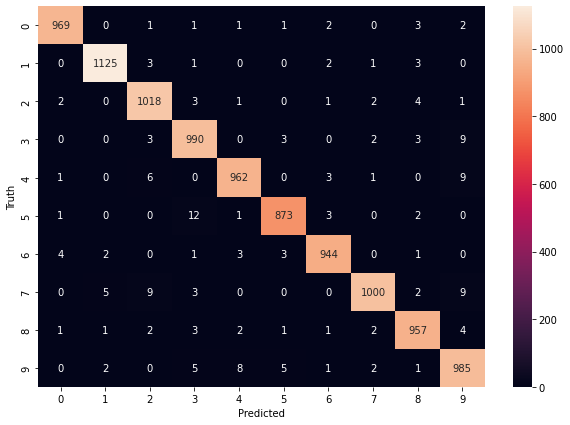

In [39]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")